# Criando os Nomes

In [149]:
import pandas as pd

In [150]:
pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [151]:
pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [152]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [153]:
print(f'Quantidade de nomes: \n\tMasculino : {len(nomes_m)} \n\tFeminino : {len(nomes_f)}')

Quantidade de nomes: 
	Masculino : 200 
	Feminino : 200


In [154]:
frames = [nomes_m, nomes_f]

In [155]:
frames

[          nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198    M
 198     ALVARO       0    65444   199    M
 199    GEOVANE       0    65435   200    M
 
 [200 rows x 5 columns],
           nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198 

In [156]:
pd.concat(frames)['nome'].to_frame()

,nome
0,JOSE
1,JOAO
2,ANTONIO
3,FRANCISCO
4,CARLOS
...,...
195,ROSANE
196,IVONETE
197,LUCIANE
198,ISADORA


In [157]:
nomes = pd.concat(frames)['nome'].to_frame()

In [158]:
nomes.sample(5)

,nome
42,MATHEUS
76,CRISTIANO
65,SILVANA
52,LUZIA
187,NAIARA


# Incluir IDs dos alunos

In [159]:
import numpy as np
np.random.seed(123)

In [160]:
total_alunos = len(nomes)
total_alunos

400

In [161]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [162]:
nomes.head(10)

,nome,id_aluno
0,JOSE,235
1,JOAO,43
2,ANTONIO,304
3,FRANCISCO,156
4,CARLOS,343
5,PAULO,310
6,PEDRO,55
7,LUCAS,288
8,LUIZ,379
9,MARCOS,92


In [163]:
dominios= ['@dominioemail.com.br', '@servicoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [164]:
nomes

,nome,id_aluno,dominio
0,JOSE,235,@dominioemail.com.br
1,JOAO,43,@servicoemail.com
2,ANTONIO,304,@servicoemail.com
3,FRANCISCO,156,@servicoemail.com
4,CARLOS,343,@servicoemail.com
...,...,...,...
195,ROSANE,231,@dominioemail.com.br
196,IVONETE,99,@servicoemail.com
197,LUCIANE,323,@dominioemail.com.br
198,ISADORA,383,@servicoemail.com


In [165]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [166]:
nomes.sample(5)

,nome,id_aluno,dominio,email
46,LUCIANO,358,@servicoemail.com,luciano@servicoemail.com
38,JAQUELINE,294,@dominioemail.com.br,jaqueline@dominioemail.com.br
136,KARINA,271,@dominioemail.com.br,karina@dominioemail.com.br
119,IRENE,4,@servicoemail.com,irene@servicoemail.com
101,SILVIO,298,@servicoemail.com,silvio@servicoemail.com


# Aula 2

## Criando tabela Cursos

In [167]:
import html5lib

In [168]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
pd.read_html(url)

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [169]:
cursos = pd.read_html(url)

In [170]:
type(cursos)

list

In [171]:
cursos[0]

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [172]:
cursos = cursos[0]

In [173]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [174]:
type(cursos)

pandas.core.frame.DataFrame

### Alterando o index

In [175]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [176]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [177]:
cursos['id'] = cursos.index + 1

In [178]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [179]:
cursos = cursos.set_index('id')

In [180]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [181]:
nomes.head()

,nome,id_aluno,dominio,email
0,JOSE,235,@dominioemail.com.br,jose@dominioemail.com.br
1,JOAO,43,@servicoemail.com,joao@servicoemail.com
2,ANTONIO,304,@servicoemail.com,antonio@servicoemail.com
3,FRANCISCO,156,@servicoemail.com,francisco@servicoemail.com
4,CARLOS,343,@servicoemail.com,carlos@servicoemail.com


## Matriculando alunos nos cursos

In [187]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [188]:
nomes.head()

,nome,id_aluno,dominio,email,matriculas
0,JOSE,235,@dominioemail.com.br,jose@dominioemail.com.br,4
1,JOAO,43,@servicoemail.com,joao@servicoemail.com,1
2,ANTONIO,304,@servicoemail.com,antonio@servicoemail.com,1
3,FRANCISCO,156,@servicoemail.com,francisco@servicoemail.com,2
4,CARLOS,343,@servicoemail.com,carlos@servicoemail.com,1


In [189]:
nomes.matriculas.describe()

count    400.000000
mean       1.982500
std        1.434342
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       12.000000
Name: matriculas, dtype: float64

In [190]:
import seaborn as sns

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

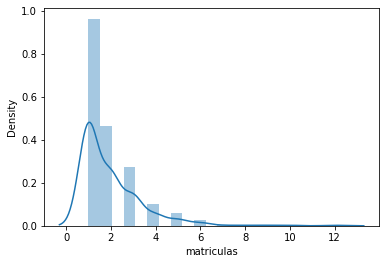

In [194]:
sns.distplot(nomes.matriculas)

In [195]:
nomes.matriculas.value_counts()

1     202
2      97
3      57
4      21
5      12
6       6
7       1
8       1
9       1
10      1
12      1
Name: matriculas, dtype: int64

In [196]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
125,VALMIR,20,@servicoemail.com,valmir@servicoemail.com,1
59,ISABEL,51,@dominioemail.com.br,isabel@dominioemail.com.br,2
101,SILVIO,298,@servicoemail.com,silvio@servicoemail.com,2
41,DANIELA,204,@servicoemail.com,daniela@servicoemail.com,1
182,CHARLES,389,@dominioemail.com.br,charles@dominioemail.com.br,1


## Seleção de cursos

In [197]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [200]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [202]:
matriculas.head()

,id_aluno,id_curso
0,235,4
1,235,11
2,235,18
3,235,2
4,43,2


In [203]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
1,75,Lógica de programação
2,68,Java para Web
3,19,C# para Web
4,29,Ruby on Rails
5,19,Cursos de Python
6,1,PHP com MySql
7,34,.NET para web
8,26,Novas integrações com Java
9,44,TDD com Java


In [204]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,75,Lógica de programação
2,68,Java para Web
3,19,C# para Web
4,29,Ruby on Rails
5,19,Cursos de Python
6,1,PHP com MySql
7,34,.NET para web
8,26,Novas integrações com Java
9,44,TDD com Java


In [205]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
45,ANDREIA,196,@servicoemail.com,andreia@servicoemail.com,1
42,MATHEUS,268,@servicoemail.com,matheus@servicoemail.com,1
21,VERA,309,@dominioemail.com.br,vera@dominioemail.com.br,1


In [206]:
cursos.head(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web


In [207]:
matriculas.head(3)

,id_aluno,id_curso
0,235,4
1,235,11
2,235,18


In [208]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_de_alunos'})

In [209]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,75,Lógica de programação
2,68,Java para Web
3,19,C# para Web


## Saída em diferentes formatos

In [210]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [213]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,75,Lógica de programação
1,68,Java para Web
2,19,C# para Web
3,29,Ruby on Rails
4,19,Cursos de Python
5,1,PHP com MySql
6,34,.NET para web
7,26,Novas integrações com Java
8,44,TDD com Java
9,42,Código limpo com C#


In [214]:
matriculas_json = matriculas_por_curso.to_json()

In [215]:
matriculas_json

'{"quantidade_de_alunos":{"1":75,"2":68,"3":19,"4":29,"5":19,"6":1,"7":34,"8":26,"9":44,"10":42,"11":38,"12":3,"13":49,"14":66,"15":60,"16":56,"17":55,"18":54,"19":32,"20":23},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [216]:
matriculas_html = matriculas_por_curso.to_html()

In [217]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>75</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>68</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>19</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>29</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>19</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>1</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>34</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>26</td>\n      <td>Novas integrações com Java</td>\n 

In [218]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>75</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>68</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>19</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>29</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>19</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>34</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>26</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>44</td>
 

# Criando o banco sql

In [219]:
!pip install sqlalchemy

In [220]:
from sqlalchemy import create_engine, MetaData, Table

In [221]:
engine = create_engine('sqlite:///:memory:')

In [222]:
engine

Engine(sqlite:///:memory:)

In [223]:
type(engine)

sqlalchemy.engine.base.Engine

In [224]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,75,Lógica de programação
2,68,Java para Web
3,19,C# para Web


In [225]:
matriculas_por_curso.to_sql('matriculas', engine)

In [228]:
print(engine.table_names())

['matriculas']


## Buscando o banco sql

In [229]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [230]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,3,19,C# para Web
1,5,19,Cursos de Python
2,6,1,PHP com MySql
3,12,3,Hardware básico


In [231]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,75
1,Java para Web,68
2,C# para Web,19
3,Ruby on Rails,29
4,Cursos de Python,19
5,PHP com MySql,1
6,.NET para web,34
7,Novas integrações com Java,26
8,TDD com Java,44
9,Código limpo com C#,42


In [232]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [233]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,75
1,Java para Web,68
2,C# para Web,19
3,Ruby on Rails,29
4,Cursos de Python,19
5,PHP com MySql,1
6,.NET para web,34
7,Novas integrações com Java,26
8,TDD com Java,44
9,Código limpo com C#,42


In [235]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')

In [236]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,75
1,Java para Web,68
13,Desenvolvendo jogos,66


## Escrevendo no banco

In [237]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [238]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Trabalhando com excel

## Nomes dos alunos(as) das turmas

In [246]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,75,Lógica de programação
2,68,Java para Web
3,19,C# para Web
4,29,Ruby on Rails
5,19,Cursos de Python
6,1,PHP com MySql
7,34,.NET para web
8,26,Novas integrações com Java
9,44,TDD com Java


In [241]:
matriculas.head(3)

,id_aluno,id_curso
0,235,4
1,235,11
2,235,18


In [247]:
id_curso = 5
proxima_turma = matriculas.query(f"id_curso == {id_curso}")
proxima_turma

,id_aluno,id_curso
86,158,5
157,7,5
222,261,5
260,129,5
273,286,5
299,386,5
343,353,5
411,11,5
418,208,5
420,390,5


In [248]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
158,5,THIAGO,@servicoemail.com,thiago@servicoemail.com,1
7,5,DAVID,@servicoemail.com,david@servicoemail.com,2
261,5,DOMINGOS,@dominioemail.com.br,domingos@dominioemail.com.br,2
129,5,AUGUSTO,@servicoemail.com,augusto@servicoemail.com,2
286,5,HUGO,@servicoemail.com,hugo@servicoemail.com,9
386,5,VALDEMAR,@servicoemail.com,valdemar@servicoemail.com,2
353,5,CLAUDINEI,@servicoemail.com,claudinei@servicoemail.com,7
11,5,JULIANA,@dominioemail.com.br,juliana@dominioemail.com.br,3
208,5,PATRICIA,@servicoemail.com,patricia@servicoemail.com,3


In [249]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
158       THIAGO
7          DAVID
261     DOMINGOS
129      AUGUSTO
286         HUGO
386     VALDEMAR
353    CLAUDINEI
11       JULIANA
208     PATRICIA
390        ALINE
111       ELIANE
364       DEBORA
345       DAIANE
64         PAULA
66       MICHELE
57       JOSIANE
354       INGRID
340      LILIANE
215        DALVA
Name: nome, dtype: object

In [250]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
158,THIAGO
7,DAVID
261,DOMINGOS
129,AUGUSTO
286,HUGO
386,VALDEMAR
353,CLAUDINEI
11,JULIANA
208,PATRICIA


In [251]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Cursos de Python
Name: 5, dtype: object

In [252]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Cursos de Python'

In [253]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [254]:
proxima_turma

,nome
id_aluno,
158,THIAGO
7,DAVID
261,DOMINGOS
129,AUGUSTO
286,HUGO
386,VALDEMAR
353,CLAUDINEI
11,JULIANA
208,PATRICIA


In [255]:
proxima_turma = proxima_turma.rename(columns = {'nome': f'Alunos do curso de {nome_curso}'})
proxima_turma

,Alunos do curso de Cursos de Python
id_aluno,
158,THIAGO
7,DAVID
261,DOMINGOS
129,AUGUSTO
286,HUGO
386,VALDEMAR
353,CLAUDINEI
11,JULIANA
208,PATRICIA


## Exportando para excel

In [256]:
proxima_turma.head(3)

,Alunos do curso de Cursos de Python
id_aluno,
158,THIAGO
7,DAVID
261,DOMINGOS


In [258]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)